In [1]:
!pip install adamp

  Created wheel for adamp: filename=adamp-0.3.0-py3-none-any.whl size=5999 sha256=08febe05d71d721780bdb18970386da58c89fba22f67efbf597084b3c1a8cf06
  Stored in directory: /root/.cache/pip/wheels/bb/95/21/ced2d2cb9944e3a72e58fece7958973eed3fd8d0aeb6e2e450
Successfully built adamp


In [2]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 14.8 MB/s 
     |████████████████████████████████| 140 kB 62.4 MB/s 
     |████████████████████████████████| 180 kB 55.3 MB/s 
     |████████████████████████████████| 97 kB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=a163d5eb81f08d727a81c1d2472e15777802f1129e7f1fd1d892845f5d33004b
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=733c75352862b66016a6867f0e3f7a765883c81cf40218bbb59255cff9b4c59c
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [3]:
!pip install dalle-pytorch --upgrade

     |████████████████████████████████| 1.4 MB 15.1 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 51 kB 246 kB/s 
     |████████████████████████████████| 1.7 MB 58.7 MB/s 
     |████████████████████████████████| 3.3 MB 47.3 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 3.4 MB 47.6 MB/s 
     |████████████████████████████████| 22.8 MB 1.4 MB/s 
     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 4.0 MB/s 
     |████████████████████████████████| 138 kB 51.2 MB/s 
     |████████████████████████████████| 843 kB 58.0 MB/s 
     |████████████████████████████████| 127 kB 55.4 MB/s 
     |████████████████████████████████| 525 kB 55.3 MB/s 
     |████████████████████████████████| 74 kB 1.8 MB/s 
     |████████████████████████████████| 112 kB 49.3 MB/s 
     |████████████████████████████████| 596 kB 47.7 MB/s 
     |███████████████████

### Restart Runtime from here

In [ ]:
import wandb
!wandb login

In [2]:
!nvidia-smi

Fri Dec 17 14:46:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Download baseline data zip file using gdown
import os
!wget https://raw.github.com/circulosmeos/gdown.pl/master/gdown.pl
!chmod u+x gdown.pl
if os.path.exists("data"):
  pass
else:
  os.mkdir("data")
%cd data
!../gdown.pl "https://drive.google.com/file/d/1q2lHYcN_XpSzmCkNRWFheAhEQnBI_wnA" "cropped_img_selected.zip"
%cd ..

# remove gdown.pl file
!rm gdown.pl

--2021-12-17 14:46:20--  https://raw.github.com/circulosmeos/gdown.pl/master/gdown.pl
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/circulosmeos/gdown.pl/master/gdown.pl [following]
--2021-12-17 14:46:21--  https://raw.githubusercontent.com/circulosmeos/gdown.pl/master/gdown.pl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2072 (2.0K) [text/plain]
Saving to: ‘gdown.pl’

gdown.pl            100%[===================>]   2.02K  --.-KB/s    in 0s      

2021-12-17 14:46:21 (33.3 MB/s) - ‘gdown.pl’ saved [2072/2072]

/conten

### Define paths and unzip

In [4]:
# Define paths
import os
# get current working directory
ROOT_PATH = "/content/"
DATA_PATH = os.path.join(ROOT_PATH, 'data')
FILE_NAME = "cropped_img_selected.zip"
ZIP_PATH = os.path.join(DATA_PATH, FILE_NAME)
print(ROOT_PATH) 
print(DATA_PATH)
print(ZIP_PATH)

/content/
/content/data
/content/data/cropped_img_selected.zip


In [5]:
import os

BASELINE_PATH = os.path.join(DATA_PATH, 'cropped_img_selected')
BASELINE_IMG_PATH = os.path.join(BASELINE_PATH, 'val_img')
BASELINE_LABEL_PATH = os.path.join(BASELINE_PATH, 'val_label')

In [6]:
# unzip dataset
import zipfile

with zipfile.ZipFile(ZIP_PATH, 'r') as f:
    zipInfo = f.infolist()
    for member in zipInfo:
        member.filename = member.filename.encode('cp437').decode('euc-kr')
        f.extract(member, DATA_PATH)

In [7]:
# remove zip file
!rm $ZIP_PATH

In [8]:
# remove folder __MACOSX
os.system(f'rm -rf {DATA_PATH}/__MACOSX')

0

In [9]:
# remove .DS_Store
os.system(f'rm -rf {DATA_PATH}/.DS_Store')
os.system(f'rm -rf {BASELINE_PATH}/.DS_Store')
os.system(f'rm -rf {BASELINE_IMG_PATH}/.DS_Store')
os.system(f'rm -rf {BASELINE_LABEL_PATH}/.DS_Store')


0

In [10]:
import os
import glob

image_path_list = glob.glob(os.path.join(BASELINE_IMG_PATH, "*.jpg"))
text_path_list = glob.glob(f'{BASELINE_LABEL_PATH}/*.txt')
print(len(image_path_list), "images", len(text_path_list), "text files")
assert len(image_path_list) == len(text_path_list)

11899 images 11899 text files


### Read baseline dataset

In [11]:
from PIL import Image
from tqdm import tqdm

image_list = []
text_list = []

# read text and images in based on text_path_list
for text_path in tqdm(text_path_list):
    with open(text_path, 'r', encoding="utf-8") as f:
        text = f.read()
        text_list.append(text)
    basename = os.path.basename(text_path)
    basename_without_extension = os.path.splitext(basename)[0] # 파일명에서 .json 확장자를 제거하여 가져옵니다.
    image_path = os.path.join(BASELINE_IMG_PATH, f"{basename_without_extension}.jpg")
    cropped_img = Image.open(image_path)
    image_list.append(cropped_img)
    
    # check whether image and text is paired correctly
    assert os.path.basename(text_path)[0] == os.path.basename(image_path)[0] 


100%|██████████| 11899/11899 [00:01<00:00, 7306.23it/s]


/content/data/cropped_img_selected/val_label/1279536.txt
스타일에서 스타일은 스트리트이다. 하의에서 기장은 미니이다. 하의에서 색상은 화이트이다. 하의에서 카테고리는 팬츠이다. 하의에서 소재에는 니트이다. 하의에서 핏은 노멀이다.


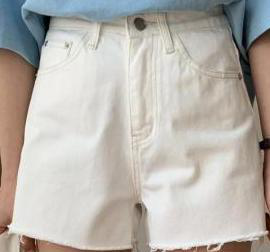

In [12]:
%config InlineBackend.figure_format = 'retina'

i = 10
print(text_path_list[i])
print(text_list[i])
image_list[i]


### Data and Random Seed Config

In [13]:
import os
import glob
from easydict import EasyDict

DATA_CFG = EasyDict()

DATA_CFG.ROOT_PATH = "/content/"
DATA_CFG.DATA_PATH = os.path.join(DATA_CFG.ROOT_PATH, 'data')

# baseline consists of 12000 images
DATA_CFG.BASELINE_PATH = os.path.join(DATA_CFG.DATA_PATH, 'cropped_img_selected')
DATA_CFG.BASELINE_IMG_PATH = os.path.join(DATA_CFG.BASELINE_PATH, 'val_img')
DATA_CFG.BASELINE_LABEL_PATH = os.path.join(DATA_CFG.BASELINE_PATH, 'val_label')

# all cropped image consists of 110000 images
DATA_CFG.ALL_CROP_IMG_PATH = os.path.join(DATA_CFG.DATA_PATH, 'cropped_img')
DATA_CFG.ALL_CAPTION_PATH = os.path.join(DATA_CFG.DATA_PATH, 'caption')

In [14]:
from __future__ import print_function
import random

import torch
import torch.nn.parallel
import numpy as np
import matplotlib.pyplot as plt

# vision imports

from PIL import Image
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid, save_image

# set environment variable for CUDA
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set random seed for reproducibility
manualSeed = 999

#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


### Config for VAE(or VQGAN) and for DALLE

In [15]:
from pathlib import Path

# helpers

def exists(val):
    return val is not None

In [16]:
""" Variational AutoEncoder Configurations  """

from easydict import EasyDict

VAE_CFG = EasyDict()

VAE_CFG.IMAGE_SIZE = 256 # pretrained vae, vqgan vae size
VAE_CFG.IMAGE_PATH = './'

VAE_CFG.NUM_TOKENS = 16384
VAE_CFG.NUM_LAYERS = 3
VAE_CFG.NUM_RESNET_BLOCKS = 2
VAE_CFG.SMOOTH_L1_LOSS = False
# VAE_CFG.EMB_DIM = 512
# VAE_CFG.HID_DIM = 256
VAE_CFG.KL_LOSS_WEIGHT = 0

VAE_CFG.STARTING_TEMP = 1.
VAE_CFG.TEMP_MIN = 0.5
VAE_CFG.ANNEAL_RATE = 1e-6

VAE_CFG.NUM_IMAGES_SAVE = 4

VAE_CFG.BASELINE = False
VAE_CFG

{'ANNEAL_RATE': 1e-06,
 'BASELINE': False,
 'IMAGE_PATH': './',
 'IMAGE_SIZE': 256,
 'KL_LOSS_WEIGHT': 0,
 'NUM_IMAGES_SAVE': 4,
 'NUM_LAYERS': 3,
 'NUM_RESNET_BLOCKS': 2,
 'NUM_TOKENS': 16384,
 'SMOOTH_L1_LOSS': False,
 'STARTING_TEMP': 1.0,
 'TEMP_MIN': 0.5}

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import shutil

vqgan_best_path = "/content/drive/MyDrive/K-Fashion/VQGAN Models/epoch=000003.ckpt"
shutil.copy(vqgan_best_path, "./")

vqgan_best_yaml_path = "/content/drive/MyDrive/K-Fashion/VQGAN Models/epoch=000003.yaml"
shutil.copy(vqgan_best_yaml_path, "./")

'./epoch=000003.yaml'

In [20]:
VQGAN_MODEL_PATH = "./epoch=000003.ckpt"
VQGAN_CONFIG_PATH = "./epoch=000003.yaml"

In [21]:
# import from huggingface transformers
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [22]:
""" DALLE-pytorch configurations """

from easydict import EasyDict

DALLE_CFG = EasyDict()

# argument parsing

DALLE_CFG.VOCAB_SIZE = tokenizer.vocab_size # refer to EDA, there are only 333 words total. but input_ids index should be in within 0 ~ 52000: https://github.com/boostcampaitech2-happyface/DALLE-Couture/blob/pytorch-dalle/EDA.ipynb
DALLE_CFG.DALLE_PATH = None # './dalle.pt'
DALLE_CFG.TAMING = True    # use VAE from taming transformers paper
DALLE_CFG.BPE_PATH = None
DALLE_CFG.RESUME = exists(DALLE_CFG.DALLE_PATH)

DALLE_CFG.EPOCHS = 10
DALLE_CFG.BATCH_SIZE = 32

# configuration mimics of: https://github.com/lucidrains/DALLE-pytorch/discussions/131
# Hyperparameter testing on pytorch-dalle: https://github.com/lucidrains/DALLE-pytorch/issues/84
# Another Reference for Hyperparams https://github.com/lucidrains/DALLE-pytorch/issues/86#issue-832121328
DALLE_CFG.LEARNING_RATE = 3e-4
DALLE_CFG.GRAD_CLIP_NORM = 0.5

DALLE_CFG.TEXT_SEQ_LEN = 128
DALLE_CFG.DEPTH = 2
DALLE_CFG.HEADS = 8
DALLE_CFG.DIM_HEAD = 64 # 8개의 head, 64는 각 head의 dimension
DALLE_CFG.REVERSIBLE = True
DALLE_CFG.LOSS_IMG_WEIGHT = 7
DALLE_CFG.ATTN_TYPES = "full"
DALLE_CFG.FF_DROPOUT = 0.0 # Feed forward dropout
DALLE_CFG.ATTN_DROPOUT = 0.0 # Attention Feed forward dropout
DALLE_CFG.STABLE = None # stable_softmax
DALLE_CFG.SHIFT_TOKENS = None
DALLE_CFG.ROTARY_EMB = None

DALLE_CFG

{'ATTN_DROPOUT': 0.0,
 'ATTN_TYPES': 'full',
 'BATCH_SIZE': 32,
 'BPE_PATH': None,
 'DALLE_PATH': None,
 'DEPTH': 2,
 'DIM_HEAD': 64,
 'EPOCHS': 10,
 'FF_DROPOUT': 0.0,
 'GRAD_CLIP_NORM': 0.5,
 'HEADS': 8,
 'LEARNING_RATE': 0.0003,
 'LOSS_IMG_WEIGHT': 7,
 'MODEL_DIM': 512,
 'RESUME': False,
 'REVERSIBLE': True,
 'ROTARY_EMB': None,
 'SHIFT_TOKENS': None,
 'STABLE': None,
 'TAMING': True,
 'TEXT_SEQ_LEN': 128,
 'VOCAB_SIZE': 32000}

In [23]:
# dalle related classes and utils
# VQGanVAE: https://github.com/lucidrains/DALLE-pytorch/blob/e1d10b9163ce78bacb5d8b42126255a0a8cdea35/dalle_pytorch/vae.py#L150-L183
from dalle_pytorch import OpenAIDiscreteVAE, VQGanVAE, DiscreteVAE, DALLE

vae = VQGanVAE(VQGAN_MODEL_PATH, VQGAN_CONFIG_PATH)

DALLE_CFG.IMAGE_SIZE = vae.image_size

dalle_params = dict(
    num_text_tokens = tokenizer.vocab_size,
    text_seq_len = DALLE_CFG.TEXT_SEQ_LEN,
    depth = DALLE_CFG.DEPTH,
    heads = DALLE_CFG.HEADS,
    dim_head = DALLE_CFG.DIM_HEAD,
    reversible = DALLE_CFG.REVERSIBLE,
    loss_img_weight=DALLE_CFG.LOSS_IMG_WEIGHT,
    attn_types=DALLE_CFG.ATTN_TYPES,
    ff_dropout=DALLE_CFG.FF_DROPOUT,
    attn_dropout=DALLE_CFG.ATTN_DROPOUT,
    stable=DALLE_CFG.STABLE,
    shift_tokens=DALLE_CFG.SHIFT_TOKENS,
    rotary_emb=DALLE_CFG.ROTARY_EMB,
)


Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 614kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Loaded VQGAN from ./epoch=000003.ckpt and ./epoch=000003.yaml


In [24]:
import glob

# VISUALIZING TRANSFORMATIONS

class ImgDatasetExample(Dataset):
    """ only for baseline cropped images """
    def __init__(
        self, 
        image_folder = "/content/data/cropped_img_selected/",
        image_transform = None,
        ):
        
        self.image_transform = image_transform

        self.image_path = Path(image_folder)
        self.image_files = [
            *self.image_path.glob("**/*.png"),
            *self.image_path.glob("**/*.jpg"),
            *self.image_path.glob("**/*.jpeg"),
        ]

    def __getitem__(self, index):
        image = Image.open(self.image_files[index])

        if self.image_transform:
            image = self.image_transform(image)
        return torch.tensor(image)

    def __len__(self):
        return len(self.image_files)

def show_transform(image, title="Default"):
    plt.figure(figsize=(16,6))
    plt.suptitle(title, fontsize = 16)
    
    # Unnormalize
    image = image / 2 + 0.5  
    npimg = image.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_transform_al(image, title="Default"):
    plt.figure(figsize=(16,6))
    plt.suptitle(title, fontsize = 16)
    
    # Unnormalize 
    plt.imshow(image)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


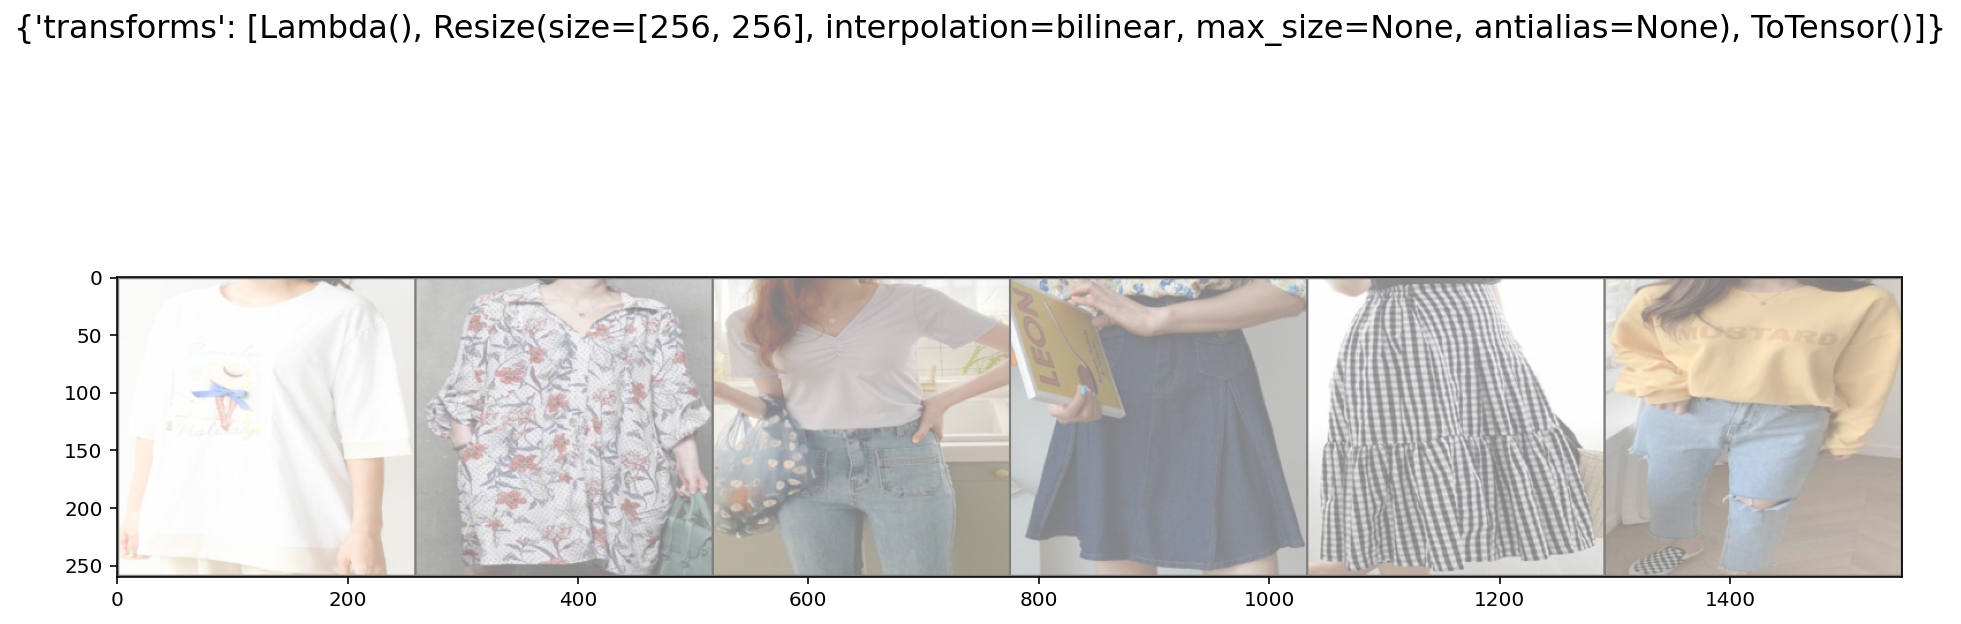

In [25]:
from torchvision import datasets, transforms
from torchvision.utils import make_grid, save_image

initial_transformation = transforms.Compose(
        [
            transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
            transforms.Resize([VAE_CFG.IMAGE_SIZE, VAE_CFG.IMAGE_SIZE]),
            # transforms.CenterCrop(VAE_CFG.IMAGE_SIZE),
            transforms.ToTensor(),
        ]
)

dataset_visual = ImgDatasetExample(
        image_folder = "/content/data/cropped_img_selected",
        image_transform = initial_transformation
    )

dataloader_visual = DataLoader(dataset=dataset_visual, batch_size=6, shuffle=True)

images = next(iter(dataloader_visual))

show_transform(make_grid(images, nrow=6), title= vars(initial_transformation))

In [39]:
from pathlib import Path
from random import randint, choice

import PIL

from torch.utils.data import Dataset
from torchvision import transforms as T


class TextImageDataset(Dataset):
    def __init__(
        self,
        text_folder="/content/data/cropped_img_selected/val_label",
        image_folder="/content/data/cropped_img_selected/val_img",
        text_len=128,
        image_size=256,
        truncate_captions=False,
        resize_ratio=0.75,
        tokenizer= None,
        shuffle=False,
    ):
        """
        @param folder: Folder containing images and text files matched by their paths' respective "stem"
        @param truncate_captions: Rather than throw an exception, captions which are too long will be truncated.
        """
        super().__init__()
        self.shuffle = shuffle
        #path = Path(folder)
        self.tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")
        
        self.text_folder = text_folder
        self.text_path = Path(self.text_folder)
        self.text_files = [*self.text_path.glob("*.txt")]

        self.image_folder = image_folder
        self.image_path = Path(self.image_folder)
        self.image_files = [
            *self.image_path.glob("*.png"),
            *self.image_path.glob("*.jpg"),
            *self.image_path.glob("*.jpeg"),
        ]

        self.text_files = {text_file.stem: text_file for text_file in self.text_files}
        self.image_files = {image_file.stem: image_file for image_file in self.image_files}

        self.keys = self.image_files.keys() & self.text_files.keys()

        self.keys = list(self.keys)
        self.text_files = {k: v for k, v in self.text_files.items() if k in self.keys}
        self.image_files = {k: v for k, v in self.image_files.items() if k in self.keys}
        self.text_len = text_len
        self.truncate_captions = truncate_captions
        self.resize_ratio = resize_ratio
        self.tokenizer = tokenizer
        self.image_transform = T.Compose(
          [
              T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
              T.Resize([image_size, image_size]),
              T.ToTensor(),
          ]
        )

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, ind):
        key = self.keys[ind]
        text_file = self.text_files[key]
        image_file = self.image_files[key]

        image = Image.open(image_file)
        descriptions = text_file.read_text(encoding="utf-8").split('\n')
        descriptions = list(filter(lambda t: len(t) > 0, descriptions))

        encoded_dict = self.tokenizer(
            descriptions,
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=self.text_len,
            add_special_tokens=True,
            return_token_type_ids=False,  # for RoBERTa
        )
        
        # flattens nested 2D tensor into 1D tensor
        flattened_dict = {i:v.squeeze() for i,v in encoded_dict.items()}
        input_ids = flattened_dict["input_ids"]
        attention_mask = flattened_dict["attention_mask"]
        
        image_tensor = self.image_transform(image)
        return input_ids, image_tensor, attention_mask

    def random_sample(self):
        return self.__getitem__(randint(0, self.__len__() - 1))

    def sequential_sample(self, ind):
        if ind >= self.__len__() - 1:
            return self.__getitem__(0)
        return self.__getitem__(ind + 1)

    def skip_sample(self, ind):
        if self.shuffle:
            return self.random_sample()
        return self.sequential_sample(ind=ind)



In [40]:
from adamp import AdamP

# create dataset and dataloader

DALLE_CFG.resize_ratio = 1.0
DALLE_CFG.truncate_captions = True

ds = TextImageDataset(
    text_folder="/content/data/cropped_img_selected/val_label",
    image_folder="/content/data/cropped_img_selected/val_img",
    text_len=DALLE_CFG.TEXT_SEQ_LEN,
    image_size=DALLE_CFG.IMAGE_SIZE,
    resize_ratio=DALLE_CFG.resize_ratio,
    truncate_captions=DALLE_CFG.truncate_captions,
    tokenizer=tokenizer,
    shuffle=True,
)

assert len(ds) > 0, 'dataset is empty'
print(f'{len(ds)} image-text pairs found for training')

dl = DataLoader(ds, batch_size = DALLE_CFG.BATCH_SIZE, shuffle = True, drop_last = True)

11899 image-text pairs found for training


(tensor([    0,  4715, 27135,  4715,  2073, 18390, 28674,    18, 19975, 27135,
         10653,  2073,  8286, 28674,    18, 19975, 27135,  8817,  2073, 10500,
          2603,  2162, 28674,    18, 19975, 27135, 17748,  2259, 15838, 28674,
            18, 19975, 27135, 14346,  2170,  2259,  6705,  8996,  5102, 28674,
            18, 19975, 27135,  4642,  2170,  2259, 20127, 28674,    18, 19975,
         27135, 17107,  2170,  2259,  8482, 28674,    18, 19975, 27135,  1887,
          2073, 24206, 28674,    18, 10346, 27135,  8817,  2073, 24216, 28674,
            18, 10346, 27135, 17748,  2259, 10878, 28674,    18, 10346, 27135,
          8696,  2015,  2121,  2073,  1121, 31286,  2062,    18, 10346, 27135,
          4642,  2170,  2259,  1469,  2862, 28674,    18, 10346, 27135, 17107,
          2170,  2259, 25740,  2557, 28674,    18, 10346, 27135,   753,  4435,
          2073,  6383,  2635, 28674,    18, 10346, 27135,  1887,  2073, 23180,
         28674,    18,     2,     1,     1,     1,  

In [38]:
from math import log2, sqrt
import torch
from torch import nn, einsum
import torch.nn.functional as F
import numpy as np

from axial_positional_embedding import AxialPositionalEmbedding
from einops import rearrange

from dalle_pytorch import distributed_utils
from dalle_pytorch.vae import OpenAIDiscreteVAE, VQGanVAE
from dalle_pytorch.transformer import Transformer, DivideMax
from dalle_pytorch.attention import stable_softmax

In [41]:
def exists(val):
    return val is not None


def default(val, d):
    return val if exists(val) else d


class always:
    def __init__(self, val):
        self.val = val

    def __call__(self, x, *args, **kwargs):
        return self.val


def is_empty(t):
    return t.nelement() == 0


def masked_mean(t, mask, dim=1):
    t = t.masked_fill(~mask[:, :, None], 0.0)
    return t.sum(dim=1) / mask.sum(dim=1)[..., None]


def set_requires_grad(model, value):
    for param in model.parameters():
        param.requires_grad = value


def eval_decorator(fn):
    def inner(model, *args, **kwargs):
        was_training = model.training
        model.eval()
        out = fn(model, *args, **kwargs)
        model.train(was_training)
        return out

    return inner


# sampling helpers


def top_k(logits, thres=0.5):
    num_logits = logits.shape[-1]
    k = max(int((1 - thres) * num_logits), 1)
    val, ind = torch.topk(logits, k)
    probs = torch.full_like(logits, float("-inf"))
    probs.scatter_(1, ind, val)
    return probs


# discrete vae class


class ResBlock(nn.Module):
    def __init__(self, chan):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(chan, chan, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(chan, chan, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(chan, chan, 1),
        )

    def forward(self, x):
        return self.net(x) + x



In [42]:
class DALLE_Klue_Roberta(nn.Module):
    def __init__(
        self,
        *,
        # dim,
        vae,
        num_text_tokens=10000,
        text_seq_len=256,
        depth,
        heads=8,
        dim_head=64,
        reversible=False,
        attn_dropout=0.0,
        ff_dropout=0,
        sparse_attn=False,
        attn_types=None,
        loss_img_weight=7,
        stable=False,
        sandwich_norm=False,
        shift_tokens=True,
        rotary_emb=False,
        wte_dir=None,
        wpe_dir=None,
    ):
        super().__init__()
        assert isinstance(
            vae, (DiscreteVAE, OpenAIDiscreteVAE, VQGanVAE)
        ), "vae must be an instance of DiscreteVAE"
        image_size = vae.image_size
        num_image_tokens = vae.num_tokens
        image_fmap_size = vae.image_size // (2 ** vae.num_layers)
        image_seq_len = image_fmap_size ** 2

        num_text_tokens = (
            num_text_tokens + text_seq_len
        )  # reserve unique padding tokens for each position (text seq len)

        self.text_emb = torch.load(wte_dir)
        dim = self.text_emb.weight.shape[1]
        self.image_emb = nn.Embedding(num_image_tokens, dim)
        print(dim,image_fmap_size,image_fmap_size)
        self.text_pos_emb = torch.load(wpe_dir) if not rotary_emb else always(0)  # +1 for <bos>
        self.image_pos_emb = (
            AxialPositionalEmbedding(dim, axial_shape=(image_fmap_size, image_fmap_size))
            if not rotary_emb
            else always(0)
        )

        self.num_text_tokens = (
            num_text_tokens  # for offsetting logits index and calculating cross entropy loss
        )
        self.num_image_tokens = num_image_tokens

        self.text_seq_len = text_seq_len
        self.image_seq_len = image_seq_len

        seq_len = text_seq_len + image_seq_len
        total_tokens = num_text_tokens + num_image_tokens
        self.total_tokens = total_tokens
        self.total_seq_len = seq_len

        self.vae = vae
        set_requires_grad(self.vae, False)  # freeze VAE from being trained

        self.transformer = Transformer(
            dim=dim,
            causal=True,
            seq_len=seq_len,
            depth=depth,
            heads=heads,
            dim_head=dim_head,
            reversible=reversible,
            attn_dropout=attn_dropout,
            ff_dropout=ff_dropout,
            attn_types=attn_types,
            image_fmap_size=image_fmap_size,
            sparse_attn=sparse_attn,
            stable=stable,
            sandwich_norm=sandwich_norm,
            shift_tokens=shift_tokens,
            rotary_emb=rotary_emb,
        )

        self.stable = stable

        if stable:
            self.norm_by_max = DivideMax(dim=-1)

        self.to_logits = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, self.total_tokens),
        )

        seq_range = torch.arange(seq_len)
        logits_range = torch.arange(total_tokens)

        seq_range = rearrange(seq_range, "n -> () n ()")
        logits_range = rearrange(logits_range, "d -> () () d")

        logits_mask = ((seq_range >= text_seq_len) & (logits_range < num_text_tokens)) | (
            (seq_range < text_seq_len) & (logits_range >= num_text_tokens)
        )

        self.register_buffer("logits_mask", logits_mask, persistent=False)
        self.loss_img_weight = loss_img_weight

    @torch.no_grad()
    @eval_decorator
    def generate_texts(self, tokenizer, text=None, *, filter_thres=0.5, temperature=1.0):
        text_seq_len = self.text_seq_len
        if text is None or text == "":
            text_tokens = torch.tensor([[0]]).cuda()
        else:
            text_tokens = torch.tensor(tokenizer.tokenizer.encode(text)).cuda().unsqueeze(0)

        for _ in range(text_tokens.shape[1], text_seq_len):
            device = text_tokens.device

            tokens = self.text_emb(text_tokens)
            tokens += self.text_pos_emb(torch.arange(text_tokens.shape[1], device=device))

            seq_len = tokens.shape[1]

            output_transf = self.transformer(tokens)

            if self.stable:
                output_transf = self.norm_by_max(output_transf)

            logits = self.to_logits(output_transf)

            # mask logits to make sure text predicts text (except last token), and image predicts image

            logits_mask = self.logits_mask[:, :seq_len]
            max_neg_value = -torch.finfo(logits.dtype).max
            logits.masked_fill_(logits_mask, max_neg_value)
            logits = logits[:, -1, :]

            filtered_logits = top_k(logits, thres=filter_thres)
            probs = stable_softmax(filtered_logits / temperature, dim=-1)
            sample = torch.multinomial(probs, 1)

            text_tokens = torch.cat((text_tokens, sample), dim=-1)

        padding_tokens = set(
            np.arange(self.text_seq_len) + (self.num_text_tokens - self.text_seq_len)
        )
        texts = [
            tokenizer.tokenizer.decode(text_token, pad_tokens=padding_tokens)
            for text_token in text_tokens
        ]
        return text_tokens, texts

    @torch.no_grad()
    @eval_decorator
    def generate_images(
        self,
        text,
        *,
        clip=None,
        mask=None,
        filter_thres=0.5,
        temperature=1.0,
        img=None,
        num_init_img_tokens=None,
    ):
        vae, text_seq_len, image_seq_len, num_text_tokens = (
            self.vae,
            self.text_seq_len,
            self.image_seq_len,
            self.num_text_tokens,
        )
        total_len = text_seq_len + image_seq_len

        text = text[:, :text_seq_len]  # make sure text is within bounds
        out = text

        if exists(img):
            image_size = vae.image_size
            assert (
                img.shape[1] == 3 and img.shape[2] == image_size and img.shape[3] == image_size
            ), f"input image must have the correct image size {image_size}"

            indices = vae.get_codebook_indices(img)
            num_img_tokens = default(
                num_init_img_tokens, int(0.4375 * image_seq_len)
            )  # OpenAI used 14 * 32 initial tokens to prime
            assert (
                num_img_tokens < image_seq_len
            ), "number of initial image tokens for priming must be less than the total image token sequence length"

            indices = indices[:, :num_img_tokens]
            out = torch.cat((out, indices), dim=-1)

        for cur_len in range(out.shape[1], total_len):
            is_image = cur_len >= text_seq_len

            text, image = out[:, :text_seq_len], out[:, text_seq_len:]

            logits = self(text, image, mask=mask)[:, -1, :]

            filtered_logits = top_k(logits, thres=filter_thres)
            probs = F.softmax(filtered_logits / temperature, dim=-1)
            sample = torch.multinomial(probs, 1)

            sample -= (
                num_text_tokens if is_image else 0
            )  # offset sampled token if it is an image token, since logit space is composed of text and then image tokens
            out = torch.cat((out, sample), dim=-1)

            if out.shape[1] <= text_seq_len:
                mask = F.pad(mask, (0, 1), value=True)

        text_seq = out[:, :text_seq_len]

        img_seq = out[:, -image_seq_len:]
        images = vae.decode(img_seq)

        if exists(clip):
            scores = clip(text_seq, images, return_loss=False)
            return images, scores

        return images

    def forward(self, text, image=None, mask=None, return_loss=False):
        assert (
            text.shape[-1] == self.text_seq_len
        ), f"the length {text.shape[-1]} of the text tokens you passed in does not have the correct length ({self.text_seq_len})"
        device, total_seq_len = text.device, self.total_seq_len

        # make sure padding in text tokens get unique padding token id

        #text_range = torch.arange(self.text_seq_len, device=device) + (
        #    self.num_text_tokens - self.text_seq_len
        #)
        #print(torch.max(text))
        #print(text)
        #torch.save(text,'text.pt')
        #text = torch.where(text == 3, text_range, text)

        # add <bos>
        #print(text.shape)
        #print(text)
        #print(torch.max(text))
        text = F.pad(text, (1, 0), value=0)
        #print(text.shape)
        #print(text)
        #print(torch.max(text))
        tokens = self.text_emb(text)
        tokens += self.text_pos_emb(torch.arange(text.shape[1], device=device))

        seq_len = tokens.shape[1]

        if exists(image) and not is_empty(image):
            is_raw_image = len(image.shape) == 4

            if is_raw_image:
                image_size = self.vae.image_size
                assert tuple(image.shape[1:]) == (
                    3,
                    image_size,
                    image_size,
                ), f"invalid image of dimensions {image.shape} passed in during training"

                image = self.vae.get_codebook_indices(image)
            image_len = image.shape[1]
            image_emb = self.image_emb(image)
            image_emb += self.image_pos_emb(image_emb)

            tokens = torch.cat((tokens, image_emb), dim=1)

            seq_len += image_len

        # when training, if the length exceeds the total text + image length
        # remove the last token, since it needs not to be trained

        if tokens.shape[1] > total_seq_len:
            seq_len -= 1
            tokens = tokens[:, :-1]

        if self.stable:
            alpha = 0.1
            tokens = tokens * alpha + tokens.detach() * (1 - alpha)

        out = self.transformer(tokens)

        if self.stable:
            out = self.norm_by_max(out)

        logits = self.to_logits(out)

        # mask logits to make sure text predicts text (except last token), and image predicts image

        logits_mask = self.logits_mask[:, :seq_len]
        max_neg_value = -torch.finfo(logits.dtype).max
        logits.masked_fill_(logits_mask, max_neg_value)

        if not return_loss:
            return logits

        assert exists(image), "when training, image must be supplied"

        offsetted_image = image + self.num_text_tokens
        labels = torch.cat((text[:, 1:], offsetted_image), dim=1)

        logits = rearrange(logits, "b n c -> b c n")

        loss_text = F.cross_entropy(
            logits[:, :, : self.text_seq_len], labels[:, : self.text_seq_len]
        )
        loss_img = F.cross_entropy(
            logits[:, :, self.text_seq_len :], labels[:, self.text_seq_len :]
        )

        loss = (loss_text + self.loss_img_weight * loss_img) / (self.loss_img_weight + 1)
        return loss


In [49]:
def save_model(path):
    save_obj = {
        'hparams': dalle_params,
        'vae_params': None,
        'weights': dalle.state_dict()
    }

    torch.save(save_obj, path)


### Get Roberta Embedding Layer
TODO: Extract Roberta, KoGPT embedding layers

In [50]:
import shutil

roberta_wte = "/content/drive/MyDrive/K-Fashion/roberta_large_wte.pt"
shutil.copy(roberta_wte, "./")

roberta_wpe = "/content/drive/MyDrive/K-Fashion/roberta_large_wpe.pt"
shutil.copy(roberta_wpe, "./")

ROBERTA_WTE_PATH = "./roberta_large_wte.pt"
ROBERTA_WPE_PATH = "./roberta_large_wpe.pt"

In [51]:
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

dalle = DALLE_Klue_Roberta(
    vae=vae,
    wpe_dir="./roberta_large_wpe.pt",
    wte_dir="./roberta_large_wte.pt",
    **dalle_params,
).to(device)

# optimizer
opt = AdamP(dalle.parameters(), lr = DALLE_CFG.LEARNING_RATE)

1024 16 16


In [52]:
model_config = dict(depth=DALLE_CFG.DEPTH, heads=DALLE_CFG.HEADS, dim_head=DALLE_CFG.DIM_HEAD)

run = wandb.init(
    project="KoDALLE",
    entity="kodalle",
    resume=False,
    config=model_config,
)

In [53]:
# experiment tracker

RESULT_DIR = "./results"
if not os.path.exists(RESULT_DIR):
    os.mkdir(RESULT_DIR)

# training
for epoch in range(DALLE_CFG.EPOCHS):
    for i, (text, images, mask) in enumerate(dl):
        text, images, mask = map(lambda t: t.to(device), (text, images, mask))

        loss = dalle(text, images, mask = mask, return_loss = True)

        loss.backward()
        clip_grad_norm_(dalle.parameters(), DALLE_CFG.GRAD_CLIP_NORM)

        opt.step()
        opt.zero_grad()

        log = {}

        if i % 100 == 0:
            print(epoch, i, f'loss - {loss.item()}')

            log = {
                **log,
                'epoch': epoch,
                'iter': i,
                'loss': loss.item()
            }

        if i % 200 == 0:
            sample_text = text[:1]
            token_list = sample_text.masked_select(sample_text != 0).tolist()
            decoded_text = tokenizer.decode(token_list)

            image = dalle.generate_images(
                text[:1],
                mask = mask[:1],
                filter_thres = 0.9    # topk sampling at 0.9
            )
            save_model(f'{RESULT_DIR}/dalle.pt')
            wandb.save(f'{RESULT_DIR}/dalle.pt')

            log = {
                **log,
                'image': wandb.Image(image, caption = decoded_text)
            }

        wandb.log(log)

    # save trained model to wandb as an artifact every epoch's end

    model_artifact = wandb.Artifact('trained-dalle', type = 'model', metadata = dict(model_config))
    model_artifact.add_file(f'{RESULT_DIR}/dalle.pt')
    run.log_artifact(model_artifact)


0 0 loss - 9.956777572631836
0 100 loss - 3.847698211669922
0 200 loss - 3.825770616531372
0 300 loss - 3.842395544052124
1 0 loss - 3.733379364013672
1 100 loss - 3.733673334121704
1 200 loss - 3.6810083389282227
1 300 loss - 3.7089452743530273
2 0 loss - 3.700066089630127
2 100 loss - 3.634568214416504
2 200 loss - 3.6003828048706055
2 300 loss - 3.5586047172546387
3 0 loss - 3.5476324558258057
3 100 loss - 3.569016933441162
3 200 loss - 3.4852375984191895
3 300 loss - 3.4594595432281494
4 0 loss - 3.4657468795776367
4 100 loss - 3.489635944366455
4 200 loss - 3.4537954330444336
4 300 loss - 3.4313244819641113
5 0 loss - 3.333747386932373
5 100 loss - 3.435145378112793
5 200 loss - 3.3853273391723633
5 300 loss - 3.4924161434173584
6 0 loss - 3.3112266063690186
6 100 loss - 3.510587215423584
6 200 loss - 3.3479504585266113
6 300 loss - 3.350259304046631
7 0 loss - 3.365590810775757
7 100 loss - 3.332930564880371
7 200 loss - 3.3483574390411377
7 300 loss - 3.3414361476898193
8 0 loss

In [54]:
!nvidia-smi

Fri Dec 17 16:43:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    39W / 300W |  16043MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------